In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

## Read the training and test data sets previously split and stored as separage csv files
## The last column labelled '86' is the 0/1 label indicationg benign/malware for each sample row.

df_train = pd.read_csv("data/train_data.csv")
df_test = pd.read_csv("data/test_data.csv")

last_column = df_train.shape[1] - 1 ## index of the label column
X_train = df_train.iloc[:,:last_column]
y_train = df_train.iloc[:,last_column]

X_test = df_test.iloc[:,:last_column]
y_test = df_test.iloc[:,last_column]

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

estimator = LogisticRegression(max_iter=5000)
parameters = {'C': [0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1.0, 2.0, 5.0, 10.0, 
                    20.0, 50.0, 100.0, 200.0, 500.0, 1000.0, 2000.0, 5000.0]}

model = GridSearchCV(estimator, parameters, scoring='accuracy', verbose=3)

model.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END ............................C=0.01;, score=0.946 total time=   0.0s
[CV 2/5] END ............................C=0.01;, score=0.948 total time=   0.0s
[CV 3/5] END ............................C=0.01;, score=0.954 total time=   0.0s
[CV 4/5] END ............................C=0.01;, score=0.955 total time=   0.0s
[CV 5/5] END ............................C=0.01;, score=0.951 total time=   0.0s
[CV 1/5] END ............................C=0.02;, score=0.949 total time=   0.0s
[CV 2/5] END ............................C=0.02;, score=0.950 total time=   0.0s
[CV 3/5] END ............................C=0.02;, score=0.957 total time=   0.0s
[CV 4/5] END ............................C=0.02;, score=0.958 total time=   0.0s
[CV 5/5] END ............................C=0.02;, score=0.953 total time=   0.0s
[CV 1/5] END ............................C=0.05;, score=0.953 total time=   0.0s
[CV 2/5] END ............................C=0.05;

GridSearchCV(estimator=LogisticRegression(max_iter=5000),
             param_grid={'C': [0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1.0, 2.0, 5.0,
                               10.0, 20.0, 50.0, 100.0, 200.0, 500.0, 1000.0,
                               2000.0, 5000.0]},
             scoring='accuracy', verbose=3)

In [13]:
model.best_params_

{'C': 1000.0}

Text(0.5, 0, 'recall')

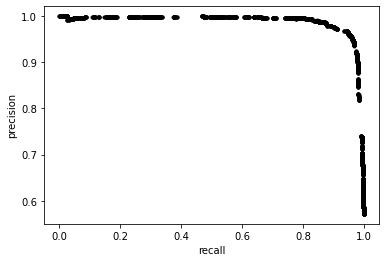

In [9]:
ypp = model.predict_proba(X_test)
pre, rec, th = precision_recall_curve(y_test, ypp[:,1])
plt.plot(rec,pre,'k.')
plt.ylabel('precision')
plt.xlabel('recall')

Text(0.7, 0.2, 'AUC=0.988')

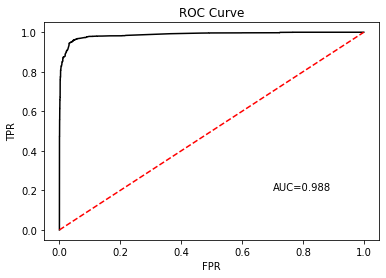

In [10]:
fpr, tpr, th = roc_curve(y_test, ypp[:,1])
auc = roc_auc_score(y_test, ypp[:,1])
plt.title('ROC Curve')
plt.plot(fpr, tpr, 'k-')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1),'r--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.text(0.7, 0.2, 'AUC='+"{:.3f}".format(auc))

In [11]:
yp = model.predict(X_test)
print('acc', accuracy_score(y_test, yp))
print('recall', recall_score(y_test, yp))
print('precision', precision_score(y_test, yp))
print('F1', f1_score(y_test, yp))
pd.DataFrame(confusion_matrix(y_test,yp))

acc 0.956590909090909
recall 0.9591194968553459
precision 0.9552572706935123
F1 0.9571844877830084


,0,1
0,4148,200
1,182,4270
